## Ⅰ. Intro

### 1. 테이블의 내용
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

### 2. 컬럼 정보
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

### 3. 질문

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

### 4. 개념파악 
- 납부세액 혹은 환급세액의 결정방법
- 소득을 3범주로 하여, 기장의무가 달라진다.  
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=fobi52&logNo=221270380307

### 5. EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df=pd.read_csv('Jobis_3o3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
age          100000 non-null float64
gender       100000 non-null object
year         100000 non-null int64
refund       100000 non-null float64
fee          100000 non-null float64
has_paid     100000 non-null bool
income_근로    40791 non-null float64
income_사업    78227 non-null float64
income_기타    25260 non-null float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [4]:
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


#### 1) 지불여부를 숫자로 바꾸고 수수료를 곱한 새로운 변수(Target)를 생성한다.
#### 2) 환급액에서 수수료를 뺀 gain이라는 변수를 생성하고, profit의 비율을 변수 pr로 생성한다.

In [5]:
df['has_paid']=df['has_paid'].replace(True,1).replace(False,0)

In [6]:
df['Target']=df.has_paid*df.fee

#### 3) 환급액과 수수료를 고려한 순 환급액과 이익률 변수를 생성

In [7]:
pr=(df.refund-df.fee)/df.refund
df['pr']=pr
gain=df.refund-df.fee
df['gain']=gain

#### 4) 나이를 카테고리화

In [8]:
cat_1=pd.cut(df.age,bins=[-1,21,24,26,29,34,37,48,100]).astype('str').str.rstrip(']').str.lstrip('(')
df['ag_cat']=cat_1

In [9]:
df['근로yn']=df.income_근로.notnull()
df['사업yn']=df.income_사업.notnull()
df['기타yn']=df.income_기타.notnull()
df['소득notnull여부']=pd.concat([df.income_근로.notnull(),df.income_사업.notnull(),df.income_기타.notnull()],axis=1).sum(1).astype('str')

#### 5) 성별컬럼 결측값처리

In [10]:
df.loc[df.gender=='-',:]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,Target,pr,gain,ag_cat,근로yn,사업yn,기타yn,소득notnull여부
2613,27.0,-,2016,559000.0,12800.0,0.0,NaN,NaN,NaN,0.0,0.977102,546200.0,"26, 29",False,False,False,0
4101,27.0,-,2017,209000.0,4300.0,0.0,NaN,NaN,NaN,0.0,0.979426,204700.0,"26, 29",False,False,False,0
9574,42.0,-,2015,175000.0,4300.0,0.0,NaN,NaN,NaN,0.0,0.975429,170700.0,"37, 48",False,False,False,0
20536,26.0,-,2017,845000.0,25100.0,0.0,NaN,NaN,NaN,0.0,0.970296,819900.0,"24, 26",False,False,False,0
28211,26.0,-,2016,650000.0,12800.0,0.0,NaN,NaN,NaN,0.0,0.980308,637200.0,"24, 26",False,False,False,0
36217,27.0,-,2018,124000.0,3400.0,0.0,NaN,NaN,NaN,0.0,0.972581,120600.0,"26, 29",False,False,False,0
37674,27.0,-,2015,252000.0,8500.0,0.0,NaN,NaN,NaN,0.0,0.966270,243500.0,"26, 29",False,False,False,0
38223,53.0,-,2015,6000.0,400.0,0.0,NaN,NaN,NaN,0.0,0.933333,5600.0,"48, 100",False,False,False,0
38441,23.0,-,2018,110000.0,3000.0,0.0,NaN,NaN,NaN,0.0,0.972727,107000.0,"21, 24",False,False,False,0
41454,41.0,-,2015,122000.0,4300.0,1.0,NaN,NaN,NaN,4300.0,0.964754,117700.0,"37, 48",False,False,False,0


In [11]:
df.query("has_paid==1").shape[0]

64643

- 성별 값이 '-'인 데이터는 22건이 존재한다. 그리고 소득원에 대한 정보가 없다. (위 3가지 컬럼에 집계되지 않는 소득이 있는 것으로 판단한다.) 
- 이중 실제 결제 된 데이터가 4건에 해당한다. 이는, 총 10만건중 결제데이터 6만4643건의 데이터규모에서 극히 일부분이며, 성별 추정의  
  근거가   적기때문에 삭제한다.

In [12]:
df=df.loc[df.gender!='-',:]

In [13]:
df.query("refund <0 and has_paid ==1.0")

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,Target,pr,gain,ag_cat,근로yn,사업yn,기타yn,소득notnull여부
10034,34.0,M,2015,-231000.0,8500.0,1.0,8989000.0,1714000.0,NaN,8500.0,1.036797,-239500.0,"29, 34",True,True,False,2
10624,25.0,F,2018,-7000.0,400.0,1.0,7508000.0,28000.0,NaN,400.0,1.057143,-7400.0,"24, 26",True,True,False,2
29515,41.0,F,2017,-10000.0,400.0,1.0,19718000.0,162000.0,128000.0,400.0,1.040000,-10400.0,"37, 48",True,True,True,3
54256,48.0,F,2018,-948000.0,3000.0,1.0,8157000.0,3975000.0,NaN,3000.0,1.003165,-951000.0,"37, 48",True,True,False,2
57756,38.0,F,2017,-107000.0,4300.0,1.0,16619000.0,737000.0,NaN,4300.0,1.040187,-111300.0,"37, 48",True,True,False,2
68881,33.0,M,2016,-322000.0,400.0,1.0,NaN,57000.0,NaN,400.0,1.001242,-322400.0,"29, 34",False,True,False,1
98352,33.0,M,2018,-8265000.0,4300.0,1.0,NaN,690000.0,NaN,4300.0,1.000520,-8269300.0,"29, 34",False,True,False,1


- 환급세액이 -인 경우는 기납부 세액이 결정세액보다 적은 경우이므로 세액의 특성상 존재하는 데이터이다.  
- 이 데이터들은 전체 데이터에서 수수료중 빈도수가 높은 400과 4300과 8500에 해당하는 데이터로 삭제하지 않는다.

In [14]:
df.fee.value_counts()

400.0       33949
4300.0      10100
900.0        5906
8500.0       4970
1300.0       4401
            ...  
125000.0        1
193500.0        1
203200.0        1
123700.0        1
240600.0        1
Name: fee, Length: 352, dtype: int64

- 수수료는 범주형 변수인 것으로 판단된다.

#### 6) 상관관계 파악

In [15]:
corr=df.corr()

Text(0.5, 1, 'Feature Correlation')

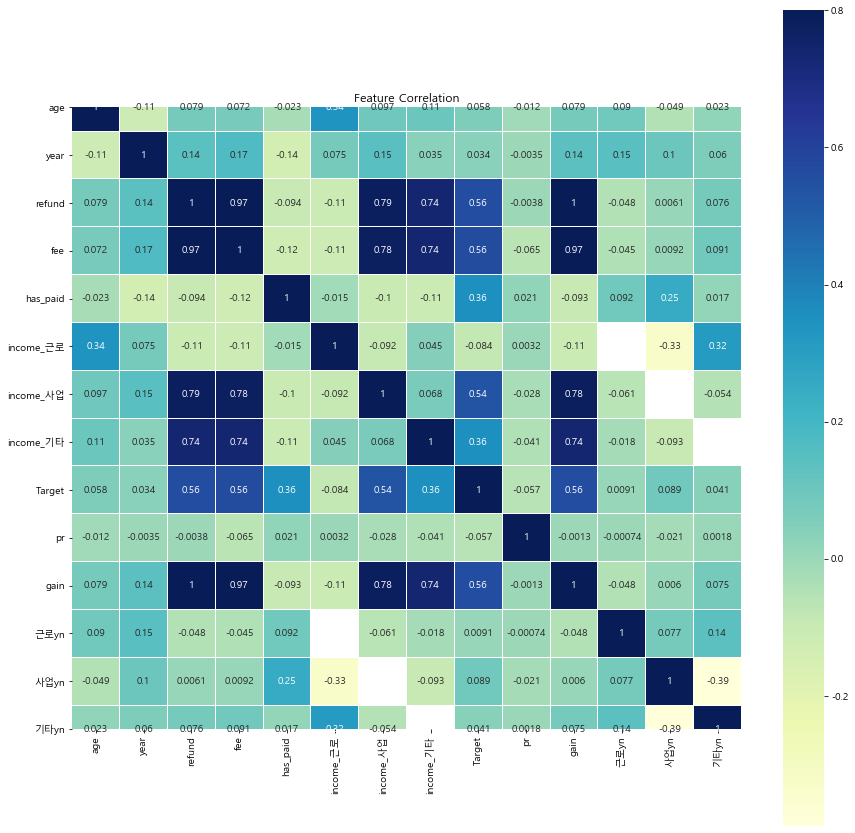

In [16]:
plt.figure(figsize=(15, 15));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation')

- 상관계수 히트맵으로는 결제여부와 상관관계 있는 변수는 없는 것으로 판단된다.
- 다만, 결제금액인 Target을 보면, 상식적으로 생각하는 것처럼 환급액과 수수료에 약한 상관관계가 있다.
- 추가로, 사업소득과 결제금액은 뚜렷한 양의 상관관계가 있으며, 기타소득과도 결제금액은 어느정도의 상관관계가 있다.

####  7) 범주형 변수간의 상관관계 파악
#### - Cramer's V
#####   범주형 변수간 상관관계 파악
#####   비교 대상 범주 대상이 3개 이상
https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

In [17]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,Target,pr,gain,ag_cat,근로yn,사업yn,기타yn,소득notnull여부
0,27.0,F,2019,5000.0,400.0,0.0,10001000.0,61000.0,NaN,0.0,0.920000,4600.0,"26, 29",True,True,False,2
1,34.0,M,2018,100000.0,1700.0,1.0,18092000.0,NaN,1815000.0,1700.0,0.983000,98300.0,"29, 34",True,False,True,2
2,28.0,F,2017,289000.0,11500.0,0.0,NaN,1461000.0,NaN,0.0,0.960208,277500.0,"26, 29",False,True,False,1
3,27.0,M,2019,410000.0,16200.0,0.0,NaN,2471000.0,NaN,0.0,0.960488,393800.0,"26, 29",False,True,False,1
4,26.0,F,2016,114000.0,4300.0,1.0,0.0,689000.0,NaN,4300.0,0.962281,109700.0,"24, 26",True,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,1.0,NaN,NaN,680000.0,11900.0,0.960465,289100.0,"26, 29",False,False,True,1
99996,62.0,F,2019,77000.0,1300.0,1.0,NaN,463000.0,NaN,1300.0,0.983117,75700.0,"48, 100",False,True,False,1
99997,24.0,M,2020,9000.0,400.0,0.0,7923000.0,54000.0,NaN,0.0,0.955556,8600.0,"21, 24",True,True,False,2
99998,24.0,M,2019,34000.0,400.0,1.0,NaN,204000.0,NaN,400.0,0.988235,33600.0,"21, 24",False,True,False,1


In [18]:
data = df[[i for i in df.columns if i in ('gender','ag_cat','has_paid','근로yn','사업yn','기타yn','소득notnull여부','year')]]

data.head()

,gender,year,has_paid,ag_cat,근로yn,사업yn,기타yn,소득notnull여부
0,F,2019,0.0,"26, 29",True,True,False,2
1,M,2018,1.0,"29, 34",True,False,True,2
2,F,2017,0.0,"26, 29",False,True,False,1
3,M,2019,0.0,"26, 29",False,True,False,1
4,F,2016,1.0,"24, 26",True,True,False,2


In [19]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

In [20]:
data_encoded.head()

,gender,year,has_paid,ag_cat,근로yn,사업yn,기타yn,소득notnull여부
0,0,4,0,3,1,1,0,2
1,1,3,1,4,1,0,1,2
2,0,2,0,3,0,1,0,1
3,1,4,0,3,0,1,0,1
4,0,1,1,2,1,1,0,2


In [21]:
from scipy.stats import chi2_contingency
import numpy as np


def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [22]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df1 = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df1

,gender,year,has_paid,ag_cat,근로yn,사업yn,기타yn,소득notnull여부
gender,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
year,0.00,1.00,0.04,0.01,0.03,0.02,0.01,0.03
has_paid,0.00,0.04,1.00,0.00,0.01,0.06,0.00,0.10
ag_cat,0.02,0.01,0.00,1.00,0.04,0.01,0.01,0.02
근로yn,0.00,0.03,0.01,0.04,1.00,0.01,0.02,0.76
사업yn,0.00,0.02,0.06,0.01,0.01,1.00,0.15,0.37
기타yn,0.00,0.01,0.00,0.01,0.02,0.15,1.00,0.26
소득notnull여부,0.00,0.03,0.10,0.02,0.76,0.37,0.26,1.00


Text(0.5, 1, 'Feature Correlation')

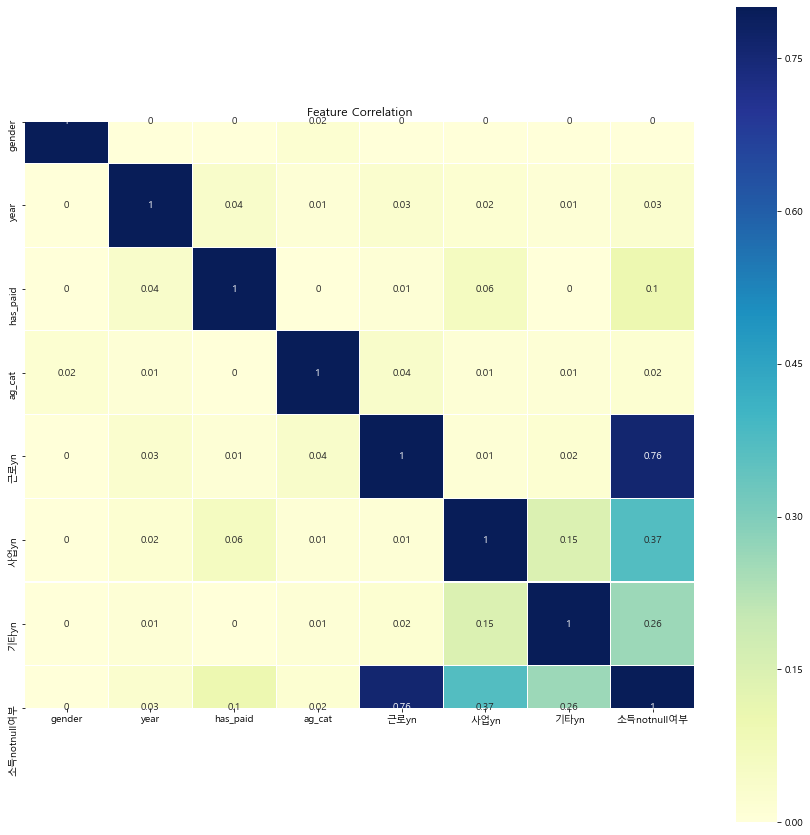

In [23]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15, 15));
sns.heatmap(df1,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation')

#### 통계적으로 변수간의 선형 상관관계는 없는 것으로 판단된다.

***

## Ⅱ. 고객의 결제여부에 영향을 미치는 요인 분석

### 1. 머신러닝 분류 모델을 통해 지불여부에 대해 데이터를 학습시키고 feature importance를 출력한 후 분석을 진행
#### 1) XGB분류모델을 통해 지불여부를 target value로 설정하고, 나머지 변수를 학습

In [24]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
X=df.reindex(['gender','year', 'refund', 'fee','income_근로','income_사업', 'income_기타','gain','age'],axis=1)
X=X.fillna(0)
y=df.has_paid
X=pd.get_dummies(X)
X.iloc[:,:8]=scaler.fit_transform(X.iloc[:,:8])
X

,year,refund,fee,income_근로,income_사업,income_기타,gain,age,gender_F,gender_M
0,0.8,0.517198,0.000000,0.054850,0.001528,0.000000,0.527427,0.181818,1,0
1,0.6,0.523139,0.004240,0.099224,0.000000,0.028897,0.533400,0.287879,0,1
2,0.4,0.534959,0.036204,0.000000,0.036585,0.000000,0.544823,0.196970,1,0
3,0.8,0.542527,0.051533,0.000000,0.061877,0.000000,0.552237,0.181818,0,1
4,0.2,0.524015,0.012720,0.000000,0.017253,0.000000,0.534126,0.166667,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,0.8,0.535710,0.037508,0.000000,0.000000,0.010826,0.545562,0.181818,1,0
99996,0.8,0.521701,0.002935,0.000000,0.011594,0.000000,0.531959,0.712121,1,0
99997,1.0,0.517448,0.000000,0.043453,0.001352,0.000000,0.527682,0.136364,0,1
99998,0.8,0.519012,0.000000,0.000000,0.005108,0.000000,0.529275,0.136364,0,1


In [26]:
y

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    0.0
99998    1.0
99999    1.0
Name: has_paid, Length: 99978, dtype: float64

In [27]:
xgb_clf=XGBClassifier(n_estimators=100,random_state=42,learning_rate=0.3,use_label_encoder=False)
xgb_clf.fit(X,y)

[09:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

#### 2) 변수중요도 파악

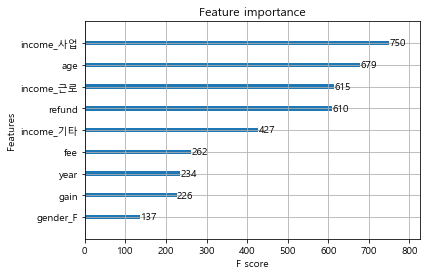

In [28]:
fig, ax = plt.subplots()
plot_importance(xgb_clf,ax=ax)

- 피어슨상관계수 히트맵에서 결제금액과 (사업소득 기타소득)이 상관관계가 있었는데, 여기서도 feature importance기준으로 상위에 속한다.
- 제일 높은 변수중요도를 가진 변수는 사업소득이고,두번쨰가 나이,3번째가 근로소득, 네번째가 환급액,5번째가 기타 소득에 해당한다.  
    => <U>이는 삼쩜삼 서비스를 이용해서 결제하는 주요 고객이 프리랜서일 수 있다는 의미로 해석할 수 있다.</U>
- 변수에 각 소득원의 유무(예: 근로yn)를 넣고 학습시켰을 때 소득원의 유무는 변수중요도가 높지 않았다. 

### 2. income 사업 변수 및 소득 데이터 분석
    - 편의를 위해 두번째로 변수중요도가 높은 나이대 그룹 데이터로 나이대별 사업소득의 평균을 시각화한다.
    - 그래프에서 보는 것처럼 결제고객의 사업소득 금액대 평균이 미결제고객의 금액대 보다 모든 연령그룹에서 훨씬 낮은 특징이 있다.
    - 다만, 최빈값을 기준으로 보면 다른 인사이트를 얻을 수 있다.  
    - 20세 이전과 26세에서 29세그룹, 34세부터 고연령층까지 사업소득의 최빈값이 구매고객 쪽이 더 높다.
    - 이를 사용하면 연령별로 income 소득의 최빈값을 기준으로하여 결제율을 상승시킬 수 있다.

#### 1) 연령별 결제여부별 각 소득 파악

#### (1) 사업소득

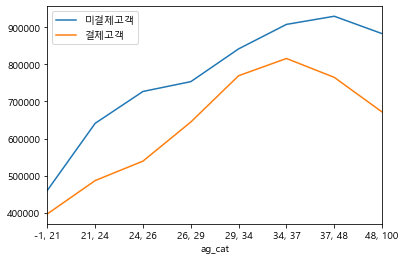

In [29]:
ag_p0=df.loc[df.income_사업.notnull(),:].query("has_paid==0").groupby('ag_cat')['income_사업'].median()
ag_p0.name='미결제고객'
ag_p0.plot()
ag_p1=df.loc[df.income_사업.notnull(),:].query("has_paid==1").groupby('ag_cat')['income_사업'].median()
ag_p1.name='결제고객'
ag_p1.plot()
plt.legend()

- 최빈값

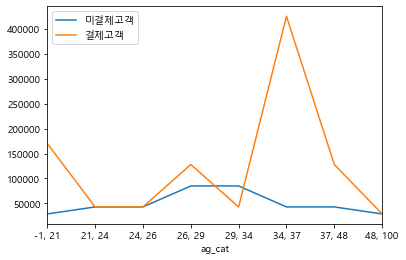

In [30]:
f1= lambda x: x.mode().min()
ag_p0=df.loc[df.income_사업.notnull(),:].query("has_paid==0").groupby('ag_cat')['income_사업'].agg(f1)
ag_p0.name='미결제고객'
ag_p0.plot()
ag_p1=df.loc[df.income_사업.notnull(),:].query("has_paid==1").groupby('ag_cat')['income_사업'].agg(f1)
ag_p1.name='결제고객'
ag_p1.plot()
plt.legend()

- 연령별 사업소득의 최빈값과 결제율 상승

In [31]:
# 연령별 최빈값
ag_p1

ag_cat
-1, 21     170000.0
21, 24      43000.0
24, 26      43000.0
26, 29     128000.0
29, 34      43000.0
34, 37     425000.0
37, 48     128000.0
48, 100     29000.0
Name: 결제고객, dtype: float64

In [32]:
# 나이대별 결제율
l1=[]
l2=[]
for i in df.ag_cat.unique():
    str_expr="ag_cat == @i"
    str_expr1="ag_cat == @i and has_paid ==1"
    l1.append(df.query(str_expr1).shape[0]/df.query(str_expr).shape[0])
    l2.append(i)
    
age_cvr=pd.DataFrame([l2,l1]).T
age_cvr.columns=['age_bin','cvr']
age_cvr=age_cvr.set_index('age_bin').sort_values('cvr',ascending=False)
age_cvr

,cvr
age_bin,
"-1, 21",0.663146
"21, 24",0.653823
"26, 29",0.653374
"24, 26",0.652258
"29, 34",0.638193
"37, 48",0.625418
"34, 37",0.621988
"48, 100",0.616695


In [33]:
# 사업 소득 변수에 최빈값 이상인 데이터의 나이대별 결제율
l1=[]
l2=[]
for i in np.arange(0,ag_p1.shape[0]):
        l1.append(ag_p1.index[i])
        l2.append(df.query("income_사업>= @i and ag_cat==@ag_p1.index[@i]").has_paid.value_counts()[1]/df.query("income_사업>= @i and ag_cat==@ag_p1.index[@i]").shape[0])

age_mode_cvr=pd.DataFrame([l1,l2]).T
age_mode_cvr.columns=['age_bin','cvr']    
age_buis_cvr=age_mode_cvr.set_index('age_bin').sort_values('cvr',ascending=False)
age_buis_cvr

,cvr
age_bin,
"26, 29",0.723167
"24, 26",0.717031
"29, 34",0.716952
"34, 37",0.715643
"21, 24",0.702346
"37, 48",0.699095
"48, 100",0.689709
"-1, 21",0.677901


In [34]:
(age_buis_cvr-age_cvr).sort_values(by='cvr',ascending=False).mean()

cvr    0.064618
dtype: float64

- 연령별 사업소득 최빈값으로 기준을 설정해 결제율이 6% 증가했다.
- <U> xgboost 모델의 feature selection에서 나타낸 것처럼, income_사업 소득의 변화로 구매에 영향을 미칠 수 있음을 확인했다.</U>

#### (2) 기타소득

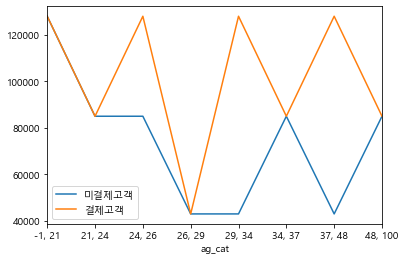

In [35]:
f1= lambda x: x.mode()[0]
ag_p0=df.loc[df.income_기타.notnull(),:].query("has_paid==0").groupby('ag_cat')['income_기타'].agg(f1)
ag_p0.name='미결제고객'
ag_p0.plot()
ag_p1=df.loc[df.income_기타.notnull(),:].query("has_paid==1").groupby('ag_cat')['income_기타'].agg(f1)
ag_p1.name='결제고객'
ag_p1.plot()
plt.legend()

In [36]:
# 기타 소득 변수에 최빈값 이상인 데이터의 나이대별 결제율
l1=[]
l2=[]
for i in np.arange(0,ag_p1.shape[0]):
        l1.append(ag_p1.index[i])
        l2.append(df.query("income_기타>= @i and ag_cat==@ag_p1.index[@i]").has_paid.value_counts()[1]/df.query("income_기타>= @i and ag_cat==@ag_p1.index[@i]").shape[0])

age_mode_cvr=pd.DataFrame([l1,l2]).T
age_mode_cvr.columns=['age_bin','cvr']    
age_etc_cvr=age_mode_cvr.set_index('age_bin').sort_values('cvr',ascending=False)
age_etc_cvr

,cvr
age_bin,
"37, 48",0.70623
"-1, 21",0.682372
"34, 37",0.671652
"26, 29",0.667482
"21, 24",0.648891
"24, 26",0.648455
"29, 34",0.646533
"48, 100",0.641509


In [37]:
(age_etc_cvr-age_cvr).sort_values(by='cvr',ascending=False).mean()

cvr    0.023529
dtype: float64

- <U>나이별 최빈값이 결제고객이 높으므로 이를 기준으로한 데이터의 결제율은 전체보다 사업소득은 6.5%, 기타 소득은 2.35%의 향상이 있다.</U>

- 다만, 근로소득의 경우에는 최빈값으로 하면 전 연령대에 걸쳐 0이 최빈값이며 결제고객이 미결제고객보다 소득 수치가 낮다.

#### (3) 근로소득

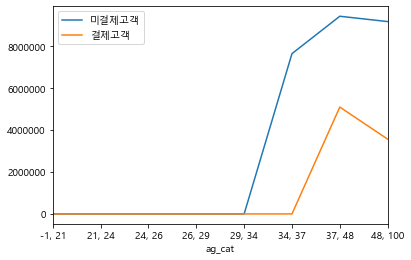

In [38]:
ag_p0=df.loc[df.income_근로.notnull(),:].query("has_paid==0").groupby('ag_cat')['income_근로'].agg(f1)
ag_p0.name='미결제고객'
ag_p0.plot()
ag_p1=df.loc[df.income_근로.notnull(),:].query("has_paid==1").groupby('ag_cat')['income_근로'].agg(f1)
ag_p1.name='결제고객'
ag_p1.plot()
plt.legend()

- 평균으로 기준을 설정하면 대체로 결제여부와 상관없이 비슷하며,34세 이후부터 급격한 성장을 보인다. 
- 그러므로 연령별 평균을 기준으로 하겠다.

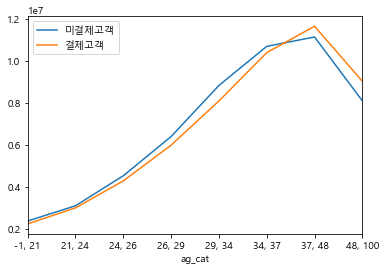

In [39]:
ag_p0=df.loc[df.income_근로.notnull(),:].query("has_paid==0").groupby('ag_cat')['income_근로'].mean()
ag_p0.name='미결제고객'
ag_p0.plot()
ag_p1=df.loc[df.income_근로.notnull(),:].query("has_paid==1").groupby('ag_cat')['income_근로'].mean()
ag_p1.name='결제고객'
ag_p1.plot()
plt.legend()

In [40]:
# 기타 소득 변수에 최빈값 이상인 데이터의 나이대별 결제율
l1=[]
l2=[]
for i in np.arange(0,ag_p1.shape[0]):
        l1.append(ag_p1.index[i])
        l2.append(df.query("income_근로>= @i and ag_cat==@ag_p1.index[@i]").has_paid.value_counts()[1]/df.query("income_근로>= @i and ag_cat==@ag_p1.index[@i]").shape[0])

age_mode_cvr=pd.DataFrame([l1,l2]).T
age_mode_cvr.columns=['age_bin','cvr']    
age_lab_cvr=age_mode_cvr.set_index('age_bin').sort_values('cvr',ascending=False)
age_lab_cvr

,cvr
age_bin,
"37, 48",0.708914
"26, 29",0.705387
"24, 26",0.703427
"34, 37",0.698121
"48, 100",0.697551
"29, 34",0.69557
"21, 24",0.692552
"-1, 21",0.671355


- 그래프에서 보는 것처럼 20세 이하에는 거의 기준 설정전과 차이가 없다.
- 그러나, 34세 이후 기울기가 급격히 증가하는 것처럼, 결제율의 개선도 눈에 띄게 증가한다.
- 결제율의 개선수치의 평균도 xgboost의 featureimportance에서 3등인 것처럼, 사업소득보단 적지만 기타소득보다는 높다.

In [41]:
(age_lab_cvr-age_cvr).sort_values(by='cvr',ascending=False).mean()

cvr    0.055998
dtype: float64

In [42]:
(age_lab_cvr-age_cvr).sort_values(by='cvr',ascending=False)

,cvr
age_bin,
"37, 48",0.0834956
"48, 100",0.0808562
"34, 37",0.0761331
"29, 34",0.0573772
"26, 29",0.0520129
"24, 26",0.0511684
"21, 24",0.0387291
"-1, 21",0.00820915


### 3. AGE 변수 분석 

#### 1) 통계적 방법으로 독립성 검정을 통해 나이 카테고리변수와 결제여부컬럼의 독립성을 확인한다.

- 독립성 검정은  두 factor 변수사이에 '귀무가설 : 독립이다. / 대립가설 : 독립이 아니다.' 를 의미한다.
- 카이제곱검정을 통한 P_value가 0.05보다 작으면 귀무가설은 기각되고 대립가설이 채택된다.  
- 주어진 데이터에서 나이카테고리와 지불여부에 대한 독립성검정시 pvalue가 0.05보다 작아 대립가설이 채택되고 서로 관련이 있다고 볼 수 있다.

In [43]:
from scipy.stats import chi2_contingency
df_age=pd.crosstab(df.ag_cat,df.has_paid)
p_value=chi2_contingency(df_age)[1]
(p_value,p_value<0.05)

(2.5428346424485214e-12, True)

In [44]:
# 나이대별 결제 데이터 합의 규모를 보기 위한 것이다.
a=df.groupby('ag_cat')['has_paid'].sum().sort_values(ascending=False)
a

ag_cat
21, 24     14050.0
26, 29     13992.0
24, 26     11770.0
29, 34      9705.0
37, 48      4862.0
-1, 21      4835.0
34, 37      2891.0
48, 100     2534.0
Name: has_paid, dtype: float64

- 21-24세, 26-29세가 가장 결제 규모가 높고 34세까지는 높은 편에 속한다.
- age_cvr은 위에서 만든 나이별 전체 데이터의 결제율데이터이다.
- 20세 이하의 데이터가 1등이기 때문에, 결제 규모의 순위와는 차이가 있다고 볼 수 있다.
- 하지만, 34세 이상의 나이가 하위권이고 그 이전의 나이대는 상위권인것처럼 전체적인 추세는 비슷하다.
- <U>결국 34세 이하의 연령에 해당하는지의 여부가 결제여부에 영향을 미치는 것으로 볼 수 있다.</U>

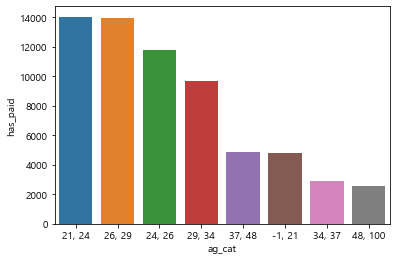

In [45]:
sns.barplot(x=a.index,y=a)

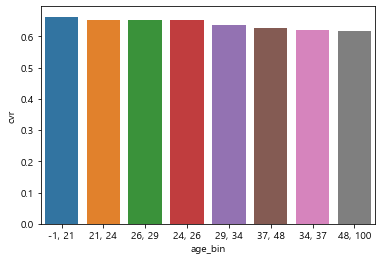

In [46]:
sns.barplot(x=age_cvr.index,y=age_cvr.cvr)

### 4. refund 변수 와 year 변수 분석 
#### 1) 히스토그램과 value_counts를 통한 refund 변수 분석
    - 결제여부에 따라 환불액의 종류는 미결제 데이터가 1745개 결제데이터가 1521개로 차이가 있다.
    - 그리고 상위빈도 환불액의 경우, 크기차이가 있어 빈도수와 환불액을 곱한 수치의 합을 비교하겠다.
    - 이렇게 하면 높은 환불액에 빈도수가 높을 경우 더 높은 수치를 얻을 수 있다. 

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0802e+04,
        7.4880e+03, 3.1470e+03, 2.1250e+03, 9.4100e+02, 3.2900e+02,
        1.6400e+02, 9.4000e+01, 4.8000e+01, 4.3000e+01, 3.6000e+01,
        2.9000e+01, 1.7000e+01, 1.4000e+01, 1.2000e+01, 6.0000e+00,
        1.1000e+01, 3.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00,
        3.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-2328000., -2079600., -1831200., -1582800., -1334400., -1086000.,
         -837600.,  -589200.,  -340800.,   -92400.,   156000.,   404400.,
          652800.,   901200.,  1149600.,  1398000.,  1646400.,  1894800.,
         2143200.,  2391600.,  2640000.,  2888400.,  3136800.,  3385200.,
         3633600.,  3882000.,  4130400.,  4378800.,  4627200.,  4875600.,
         5124000.,  5372400.,  5620800.,  5869200.,  6117600.,  6366000.,
         6

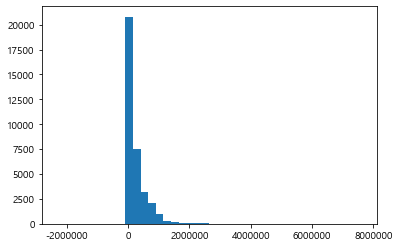

In [47]:
plt.hist(df.query("has_paid==0")['refund'],bins=40)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        3.7938e+04, 2.0299e+04, 5.1970e+03, 9.0000e+02, 1.7300e+02,
        7.2000e+01, 2.6000e+01, 1.0000e+01, 7.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-8265000., -7865250., -7465500., -7065750., -6666000., -6266250.,
        -5866500., -5466750., -5067000., -4667250., -4267500., -3867750.,
        -3468000., -3068250., -2668500., -2268750., -1869000., -1469250.,
        -1069500.,  -669750.,  -270000.,   129750.,   529500.,   929250.,
         1329000.,  1728750.,  2128500.,  2528250.,  2928000.,  3327750.,
         3727500.,  4127250.,  4527000.,  4926750.,  5326500.,  5726250.,
         6

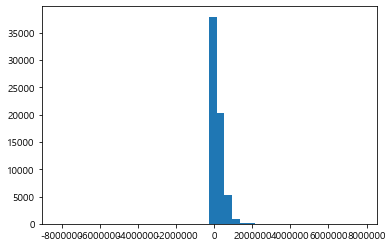

In [48]:
plt.hist(df.query("has_paid==1")['refund'],bins=40)


In [49]:
df.query("has_paid==0")['refund'].describe()

count    3.533900e+04
mean     2.471944e+05
std      3.796082e+05
min     -2.328000e+06
25%      2.800000e+04
50%      1.100000e+05
75%      3.030000e+05
max      7.608000e+06
Name: refund, dtype: float64

In [50]:
df.query("has_paid==0")['refund'].value_counts()

5000.0       995
4000.0       895
7000.0       672
6000.0       544
8000.0       463
            ... 
1314000.0      1
2346000.0      1
2028000.0      1
1241000.0      1
1366000.0      1
Name: refund, Length: 1745, dtype: int64

In [51]:
df.query("has_paid==0")['refund'].value_counts()/df.shape[0]

5000.0       0.009952
4000.0       0.008952
7000.0       0.006721
6000.0       0.005441
8000.0       0.004631
               ...   
1314000.0    0.000010
2346000.0    0.000010
2028000.0    0.000010
1241000.0    0.000010
1366000.0    0.000010
Name: refund, Length: 1745, dtype: float64

In [52]:
df_r0=df.query("has_paid==0")['refund'].value_counts()
df_r0=df_r0.reset_index()
df_r00=(df_r0[['index']].transpose()*df_r0.refund).T

In [53]:
df_r1=df.query("has_paid==1")['refund'].value_counts()
df_r1=df_r1.reset_index()
df_r11=(df_r1[['index']].transpose()*df_r1.refund).T

In [54]:
df_r11.sum()>df_r00.sum()

index    True
dtype: bool

- <U>refund*빈도수 데이터가 결제한 데이터의 경우가 미결제 데이터보다 높다.  
- 이로 인해 환불금액이 결제여부와 연관성이 있다고 할 수 있다.</U>

#### 2) year변수분석

- 19년도 까지는 연도가 지나면서 결제 여부가 증가했다. 
- 다만, 19년부터 20년사이에 결제데이터의 수가 감소하고 예상환불액은 오히려 미결제자 측에서 급격히 증가하는 등 추세가 최근에 변하였다.
- 그러므로, year 변수는 지불여부에 연관성이 없다고 볼 수 있다.

In [55]:
df_y_hp=df.groupby('year')['has_paid'].value_counts()
df_y_hp

year  has_paid
2015  1.0          2831
      0.0          1149
2016  1.0          9697
      0.0          4213
2017  1.0         12203
      0.0          5289
2018  1.0         13887
      0.0          6091
2019  1.0         14481
      0.0          6355
2020  0.0         12242
      1.0         11540
Name: has_paid, dtype: int64

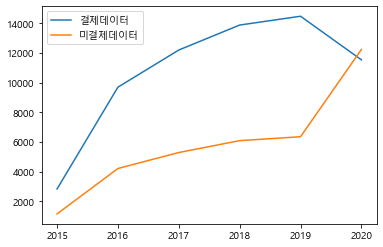

In [56]:
df_y_hp.name='count'
df_y_hp=df_y_hp.reset_index()
df_y_hp1=df_y_hp.query("has_paid==1")
df_y_hp0=df_y_hp.query("has_paid==0")
plt.plot(df_y_hp1.year,df_y_hp1['count'],label='결제데이터')
plt.plot(df_y_hp0.year,df_y_hp0['count'],label='미결제데이터')
plt.legend()

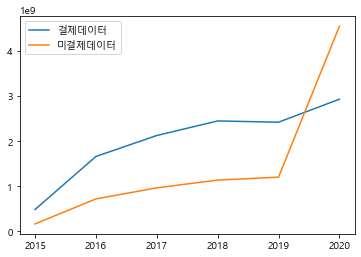

In [57]:
plt.plot(df.query("has_paid==1").groupby('year')['refund'].sum().index,df.query("has_paid==1").groupby('year')['refund'].sum(),label='결제데이터')
plt.plot(df.query("has_paid==0").groupby('year')['refund'].sum().index,df.query("has_paid==0").groupby('year')['refund'].sum(),label='미결제데이터')
plt.legend()